In [ ]:
pip install pandas numpy seaborn matplotlib scikit-learn

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# DATA ANALYSİS


In [107]:
df = pd.read_excel('/content/pusula_test_cas.xlsx')

df.head(3)

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0


1-Gender column in English expressions.,

2-There is only one unique value in the nationality column

In [108]:
df.shape

(2357, 19)

**information about the data**

In [109]:
df.info() , df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

(None,
 Kullanici_id                          0
 Cinsiyet                            778
 Dogum_Tarihi                          0
 Uyruk                                 0
 Il                                  227
 Ilac_Adi                              0
 Ilac_Baslangic_Tarihi                 0
 Ilac_Bitis_Tarihi                     0
 Yan_Etki                              0
 Yan_Etki_Bildirim_Tarihi              0
 Alerjilerim                         484
 Kronik Hastaliklarim                392
 Baba Kronik Hastaliklari            156
 Anne Kronik Hastaliklari            217
 Kiz Kardes Kronik Hastaliklari       97
 Erkek Kardes Kronik Hastaliklari    121
 Kan Grubu                           347
 Kilo                                293
 Boy                                 114
 dtype: int64)

**Viewing unique values**

In [110]:
unique_values = {col: df[col].unique() for col in df.columns}


for column, values in unique_values.items():
    print(f" {column}")
    print(f"Unique Values ({len(values)} count): {values}")
    print("\n")

 Kullanici_id
Unique Values (196 count): [107 140   2  83   7 131  61  95   3  53  81 108 121  33 194  42 182 189
 156 113 134  36 180  55 165 174 161  20  90 111 188 187 169 154  21 106
 110  66  39  73 155  29 101 168 124 160 115  92  54  99  69  10  41  94
  15  19 159 128  34 175  93 167 190  88  70  59  85  35 141 127  49  72
  17 195  65 183  62   6  80 132 138  45 117 133  91  47 112 118 166  25
 129   8  82 100 170 120  84  16  31 196 122  50 192  57 179  26 181 102
 152  37 162 135  52  11 163  71  56  68 139  63 171 176 185  89   4  98
  51  38  13  79  64  28  22 105 137  77  32 126  75 116 149 157 114  58
 109  48 147   9 186  14 145  76  97 178  96  12 144  74 130  78 158   1
 103  40 164  18 136 151   5  67  86  44 146 123 191  23  27 184  46 143
 148  60  24  43 177 193  87 172 119 142 125 173  30 153 150 104]


 Cinsiyet
Unique Values (3 count): ['Male' 'Female' nan]


 Dogum_Tarihi
Unique Values (195 count): <DatetimeArray>
['1960-03-01 00:00:00', '1939-10-12 00:00:00'

**There are too many unique values in Kronik Hastalar : Anne Baba Kardeş**

# DATA VİSUALİZATİON

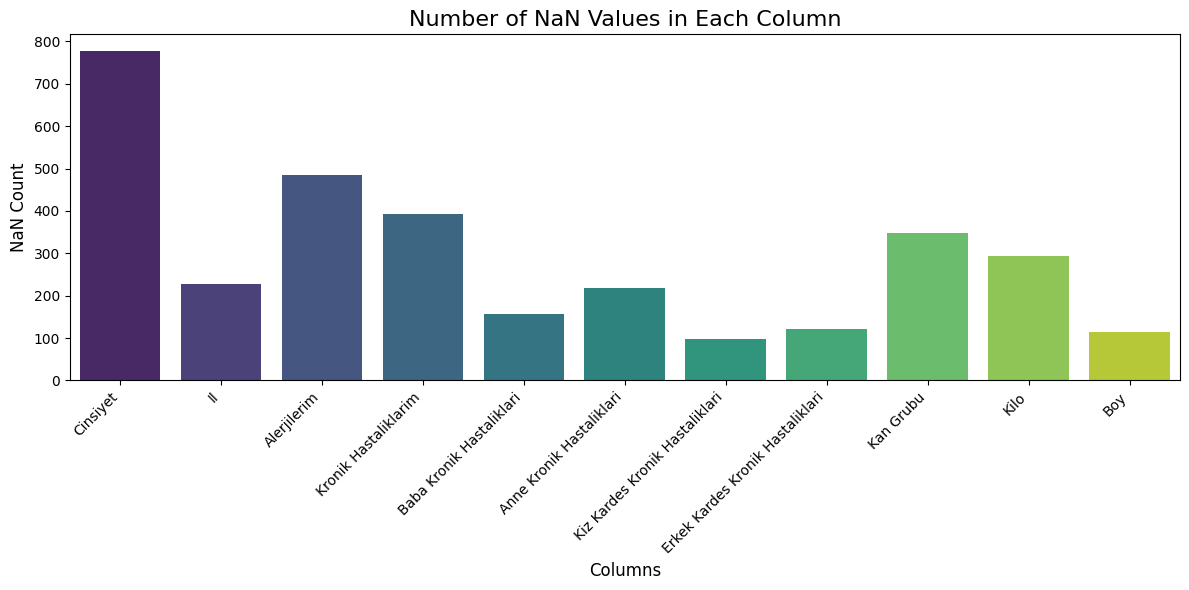

In [111]:
null_counts = df.isnull().sum()

null_counts = null_counts[null_counts > 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')

plt.title('Number of NaN Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('NaN Count', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

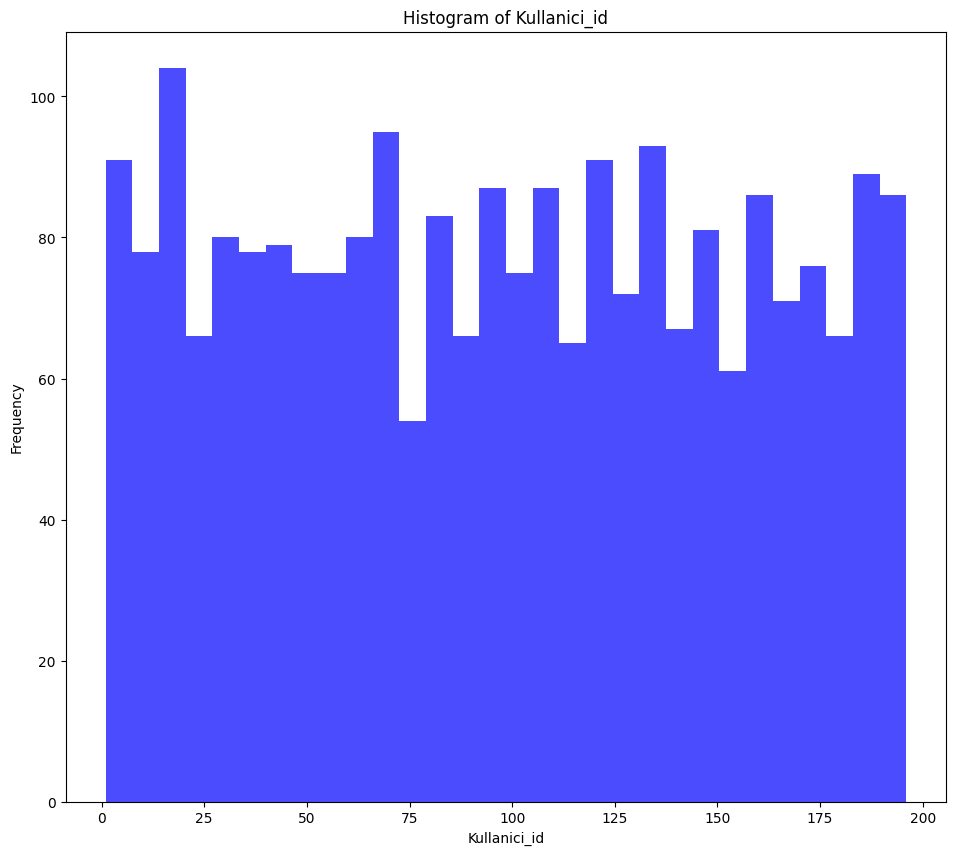

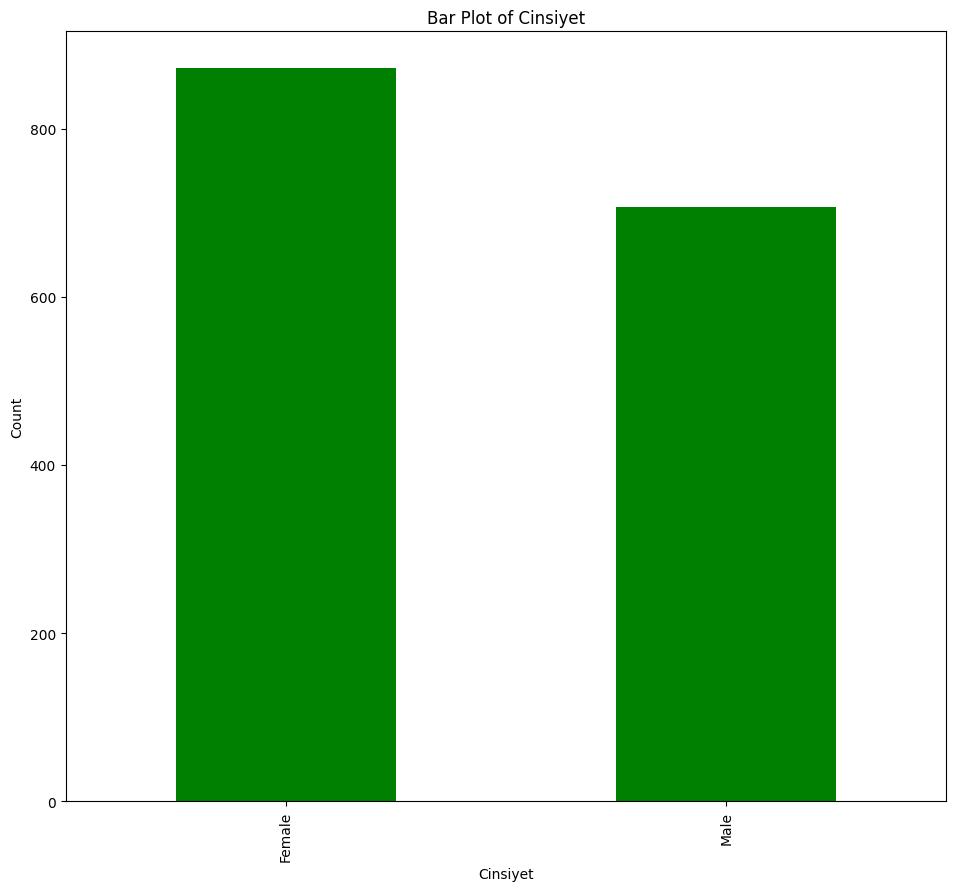

<Figure size 2500x1000 with 0 Axes>

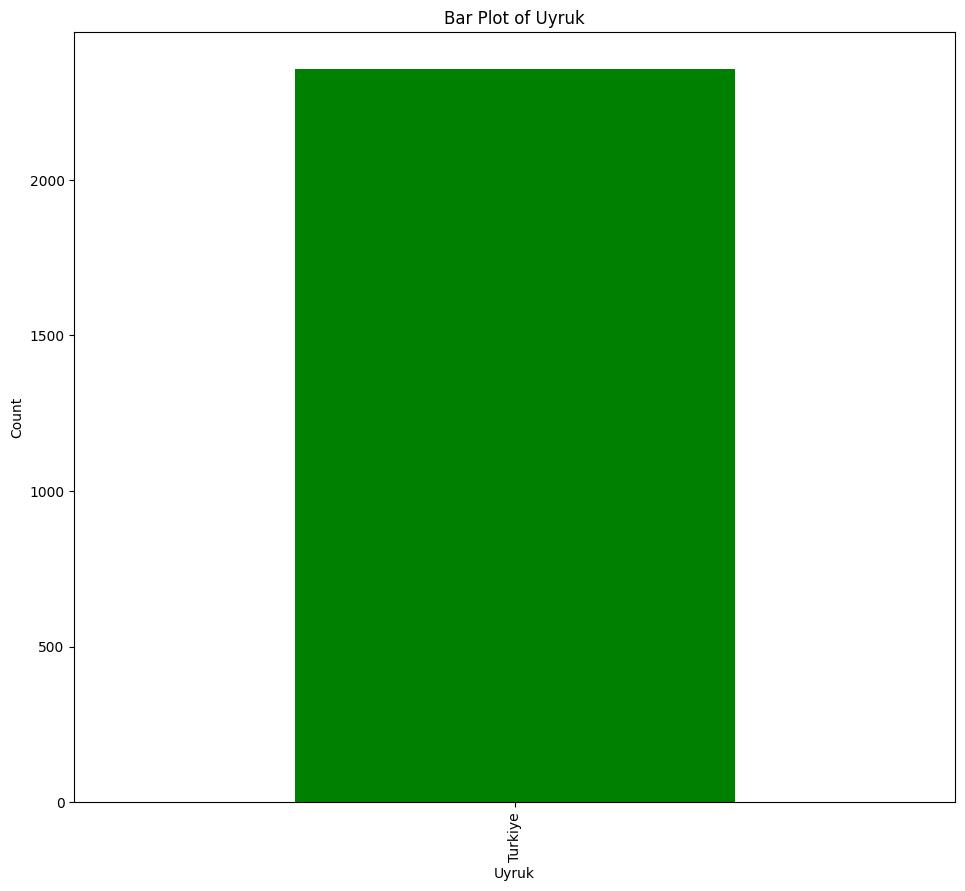

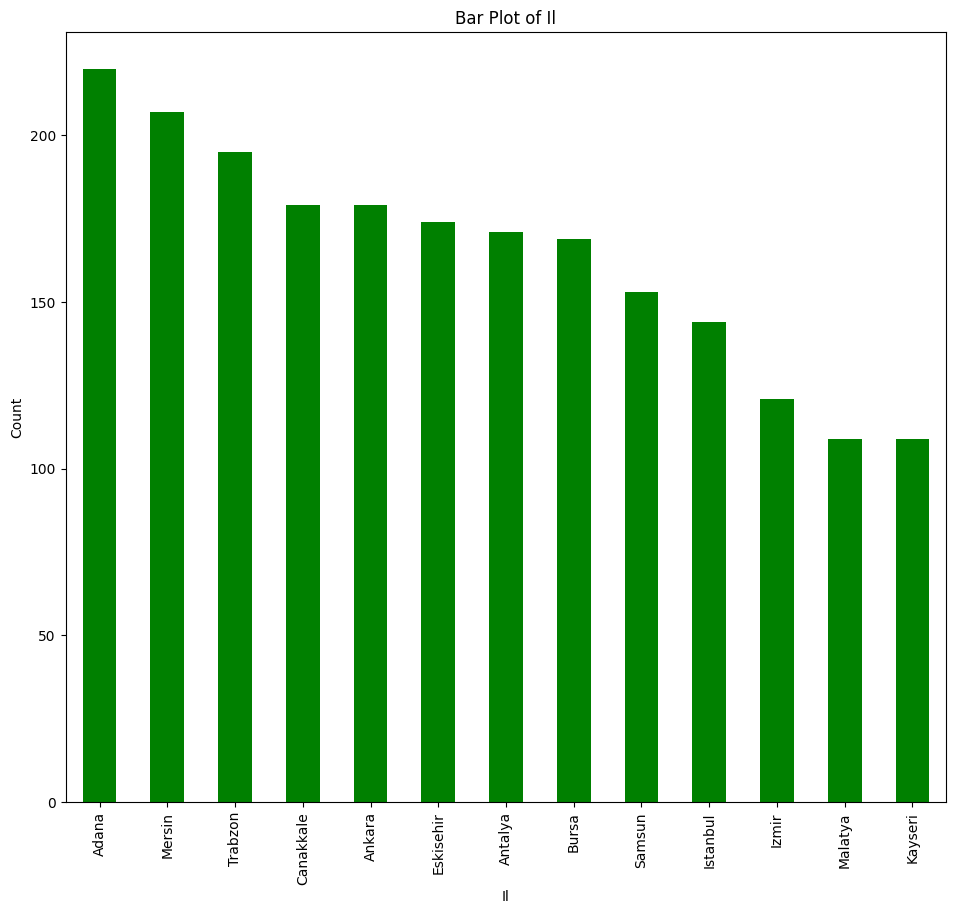

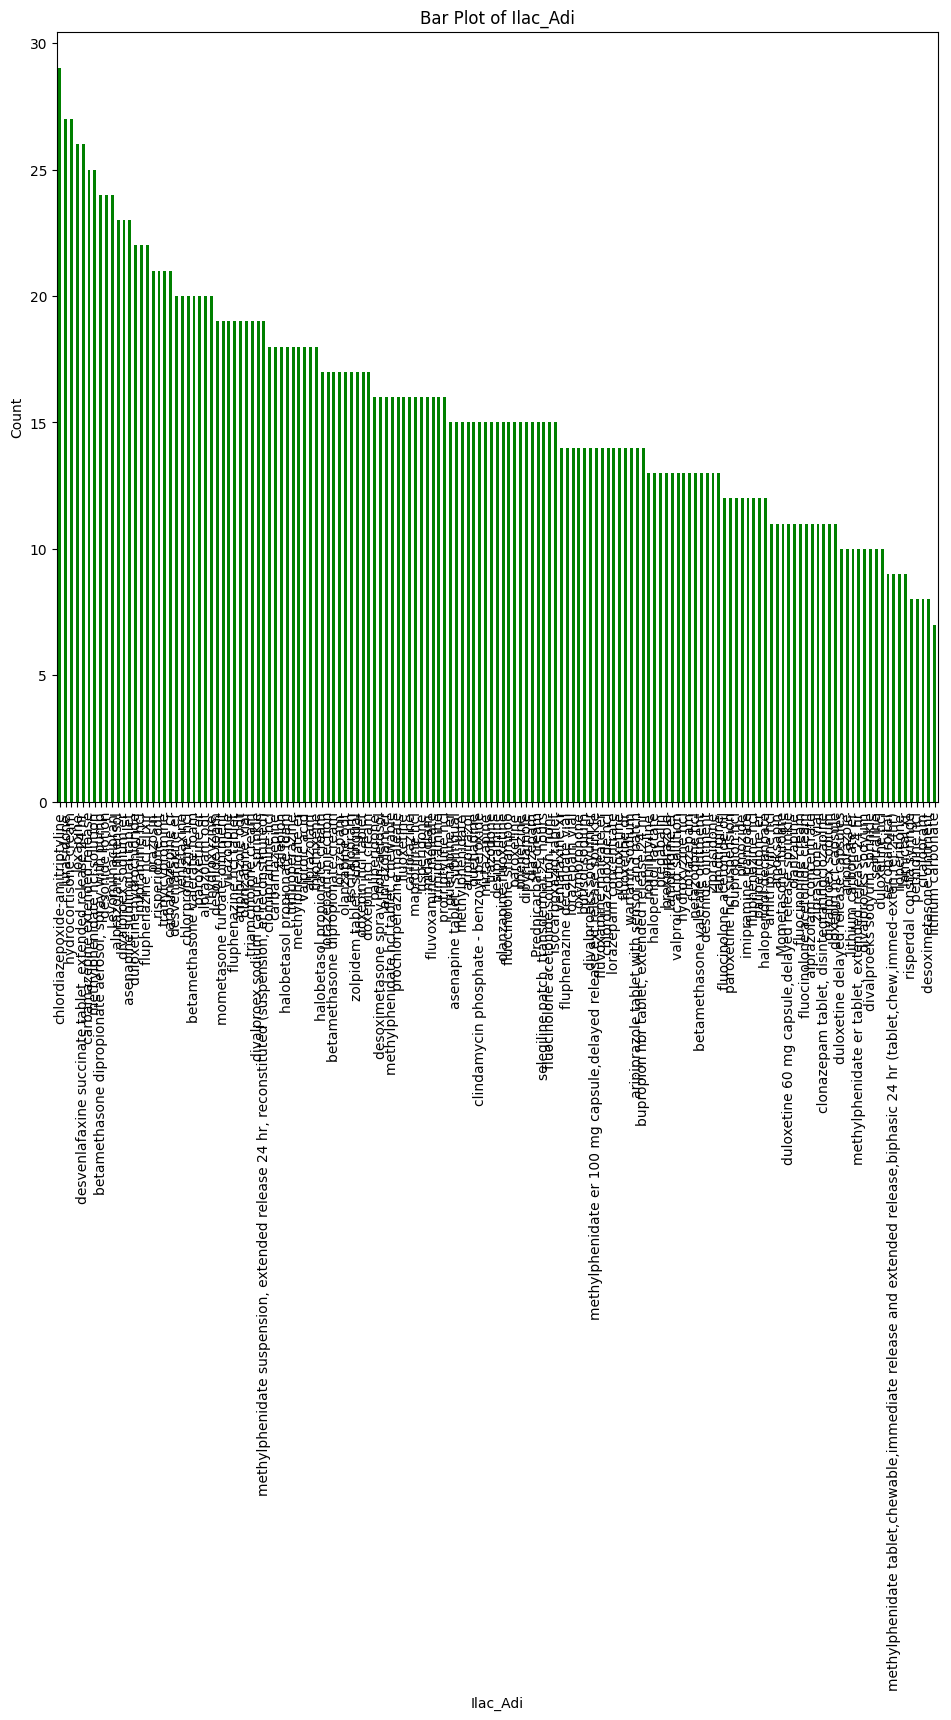

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

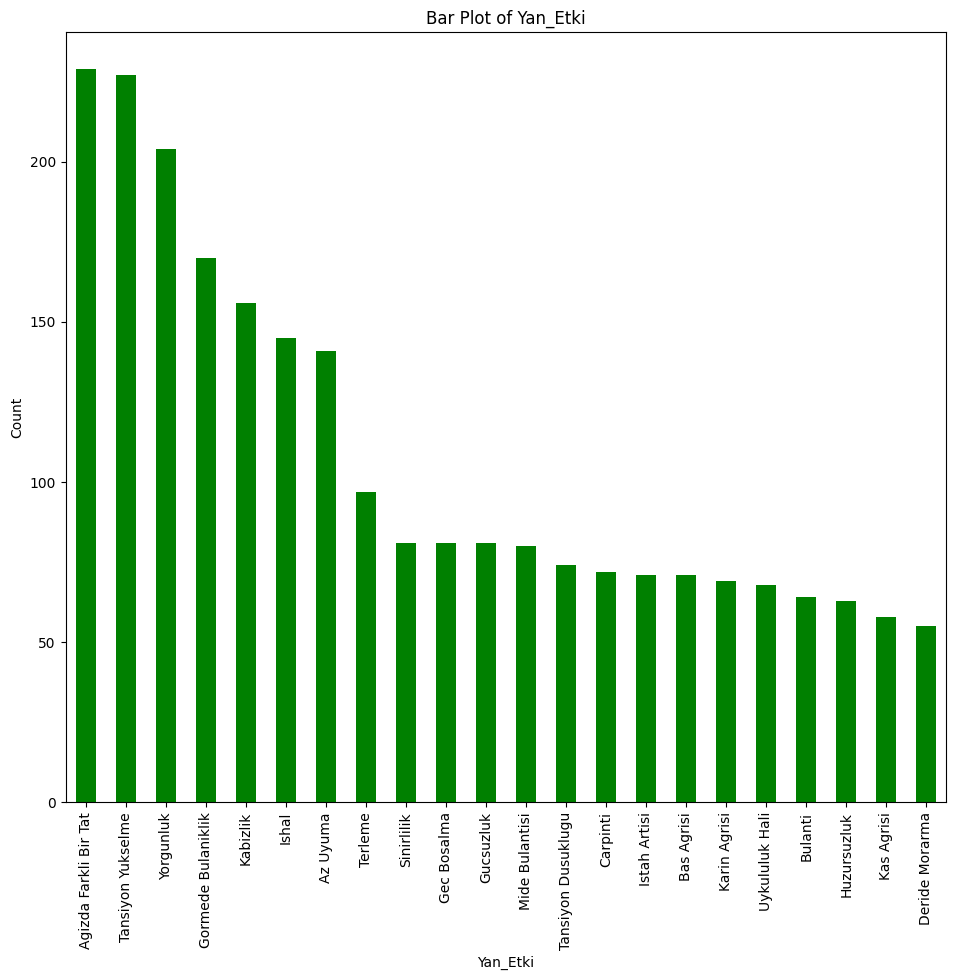

<Figure size 2500x1000 with 0 Axes>

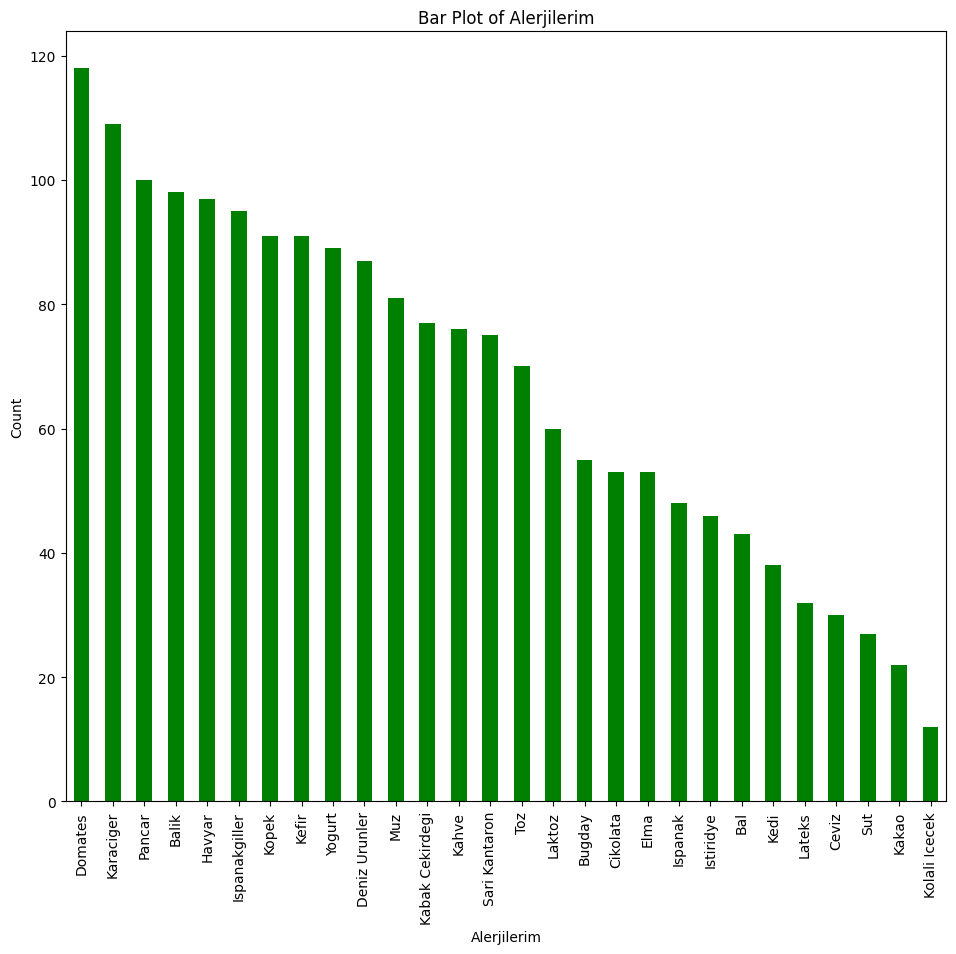

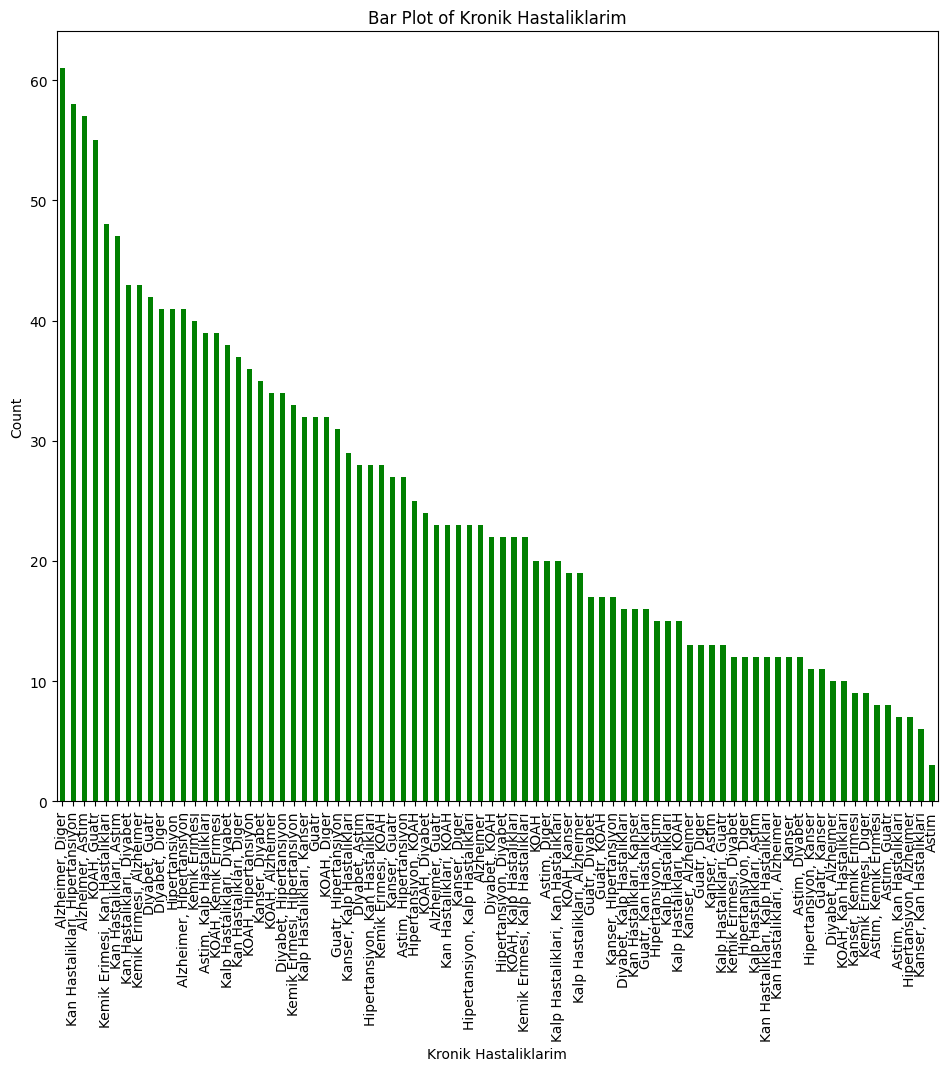

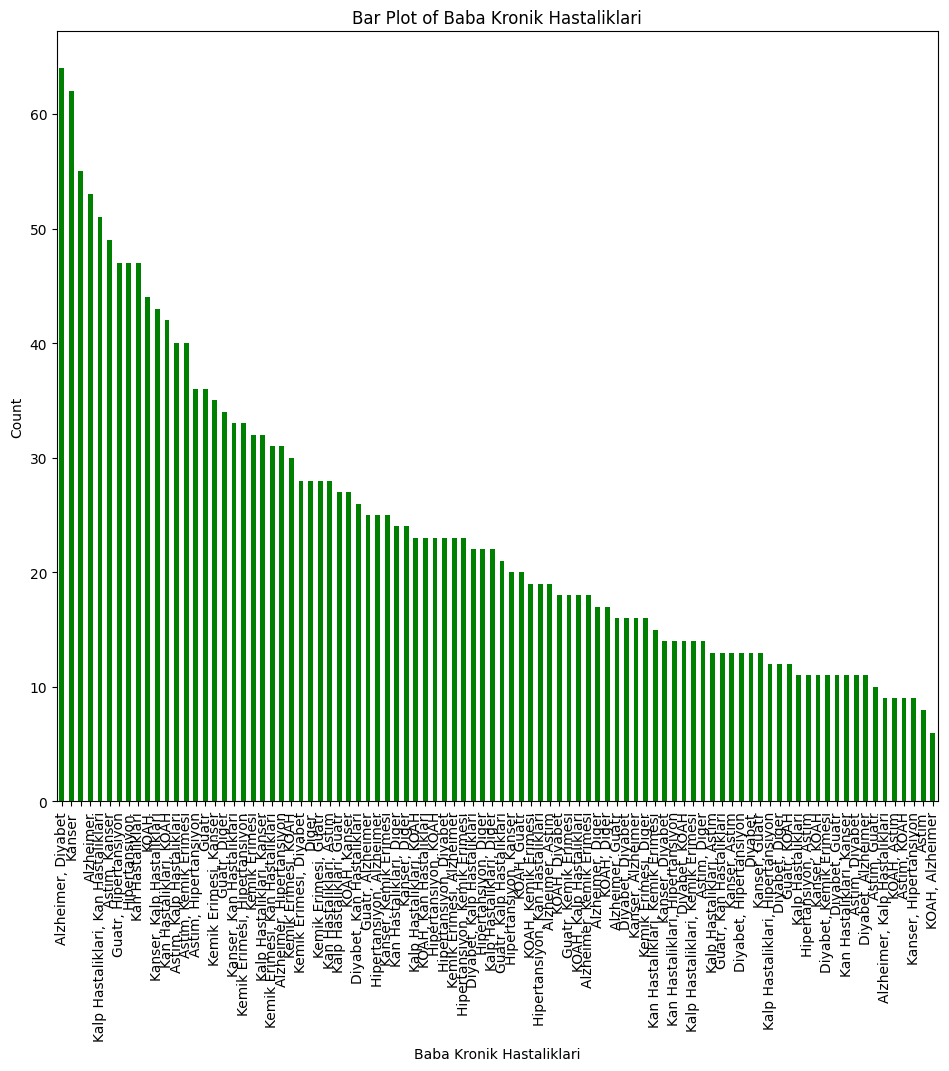

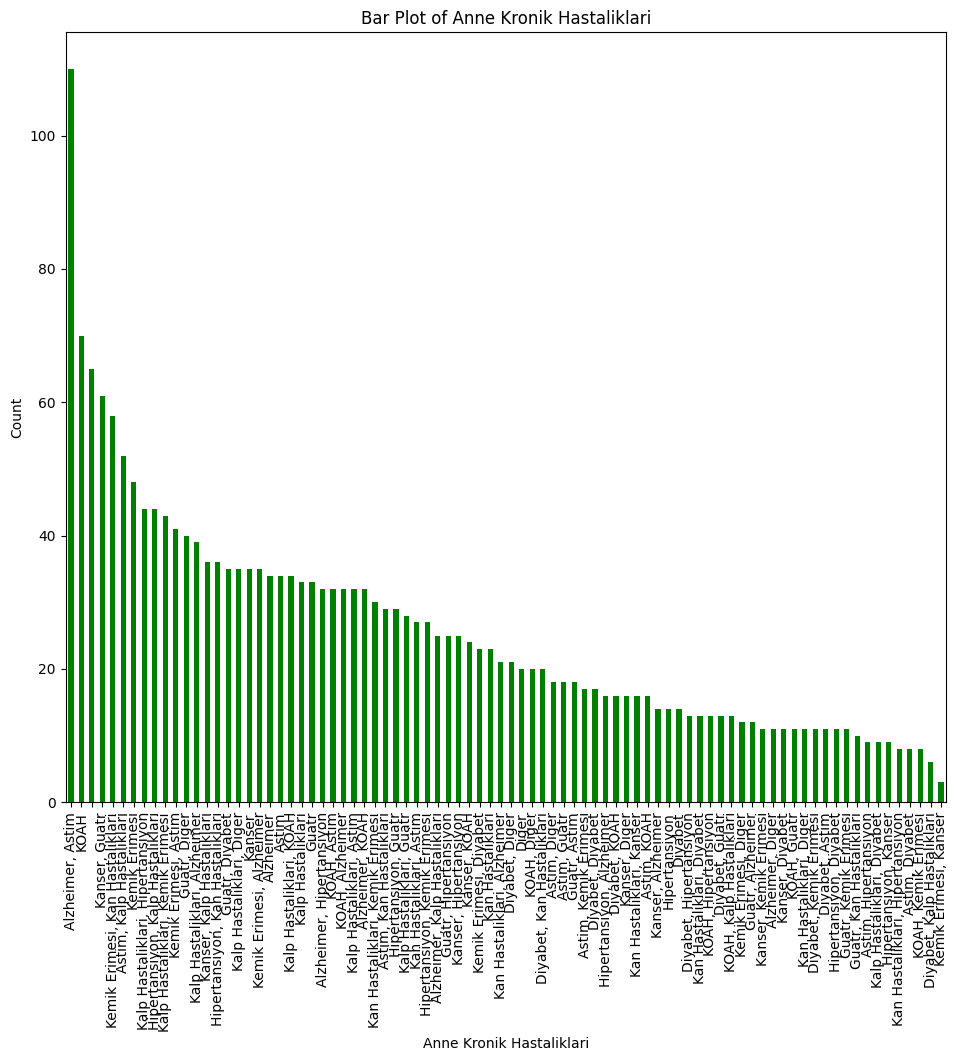

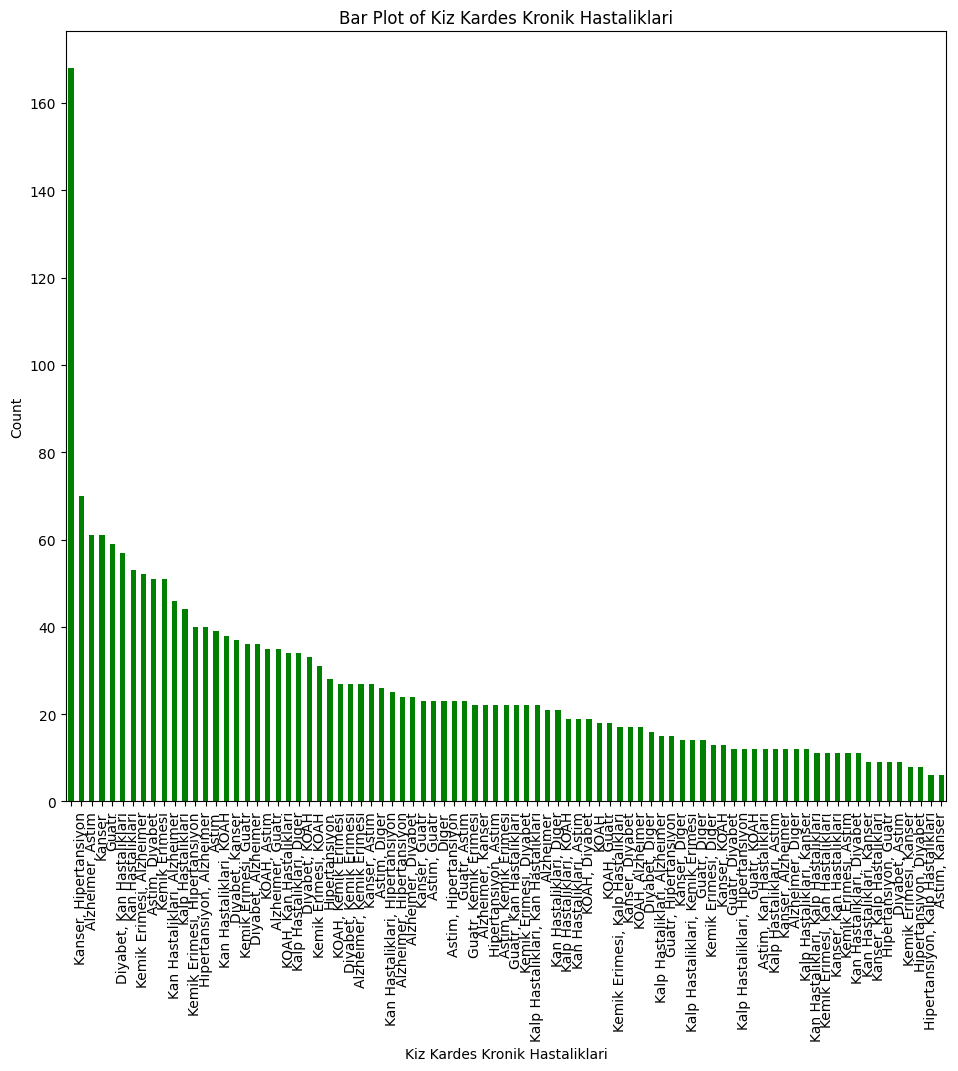

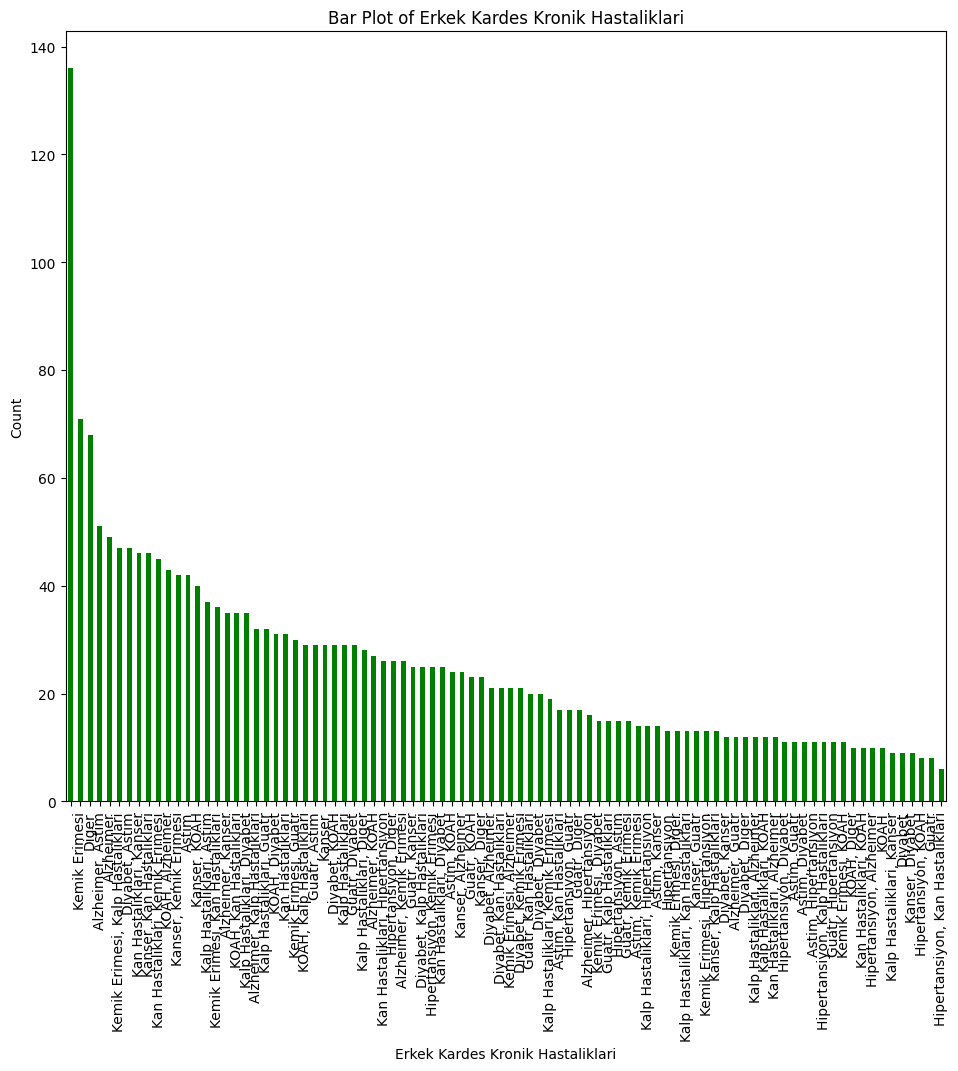

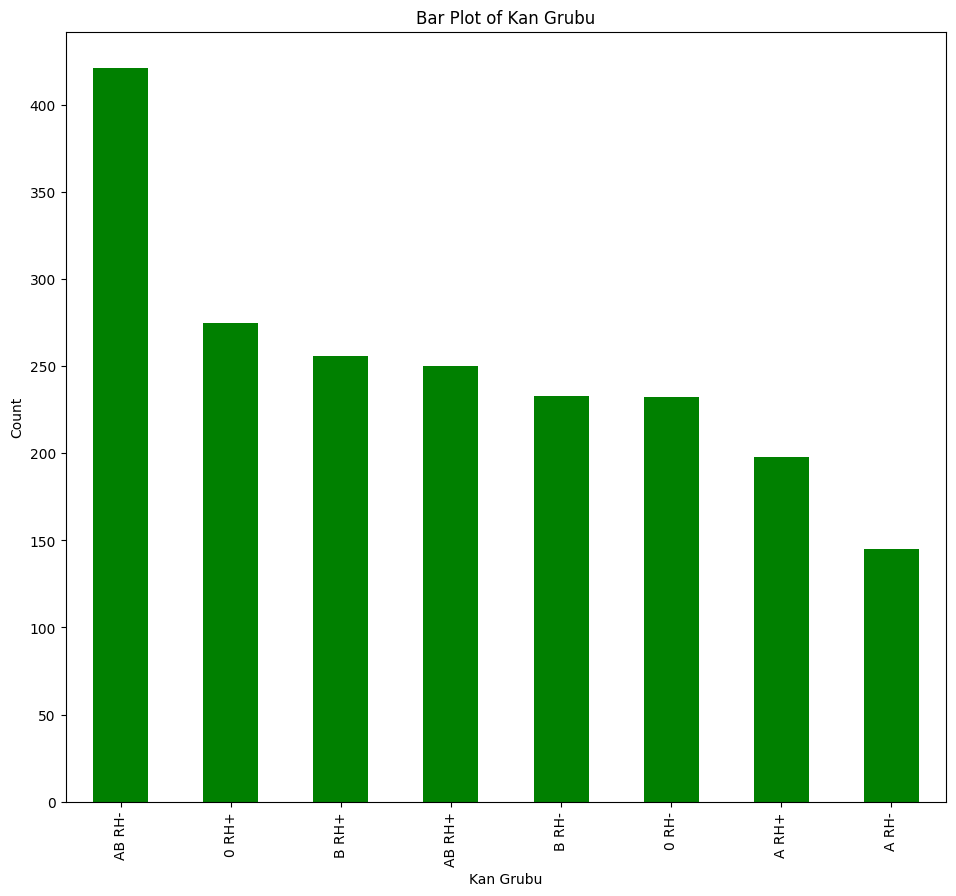

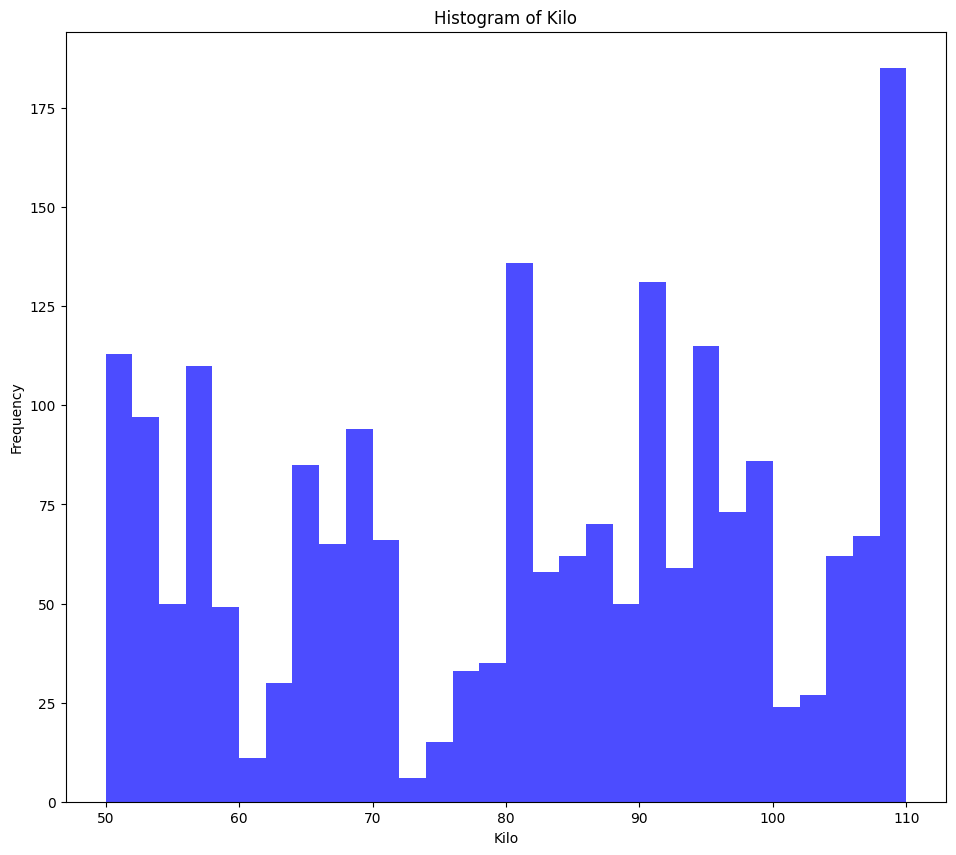

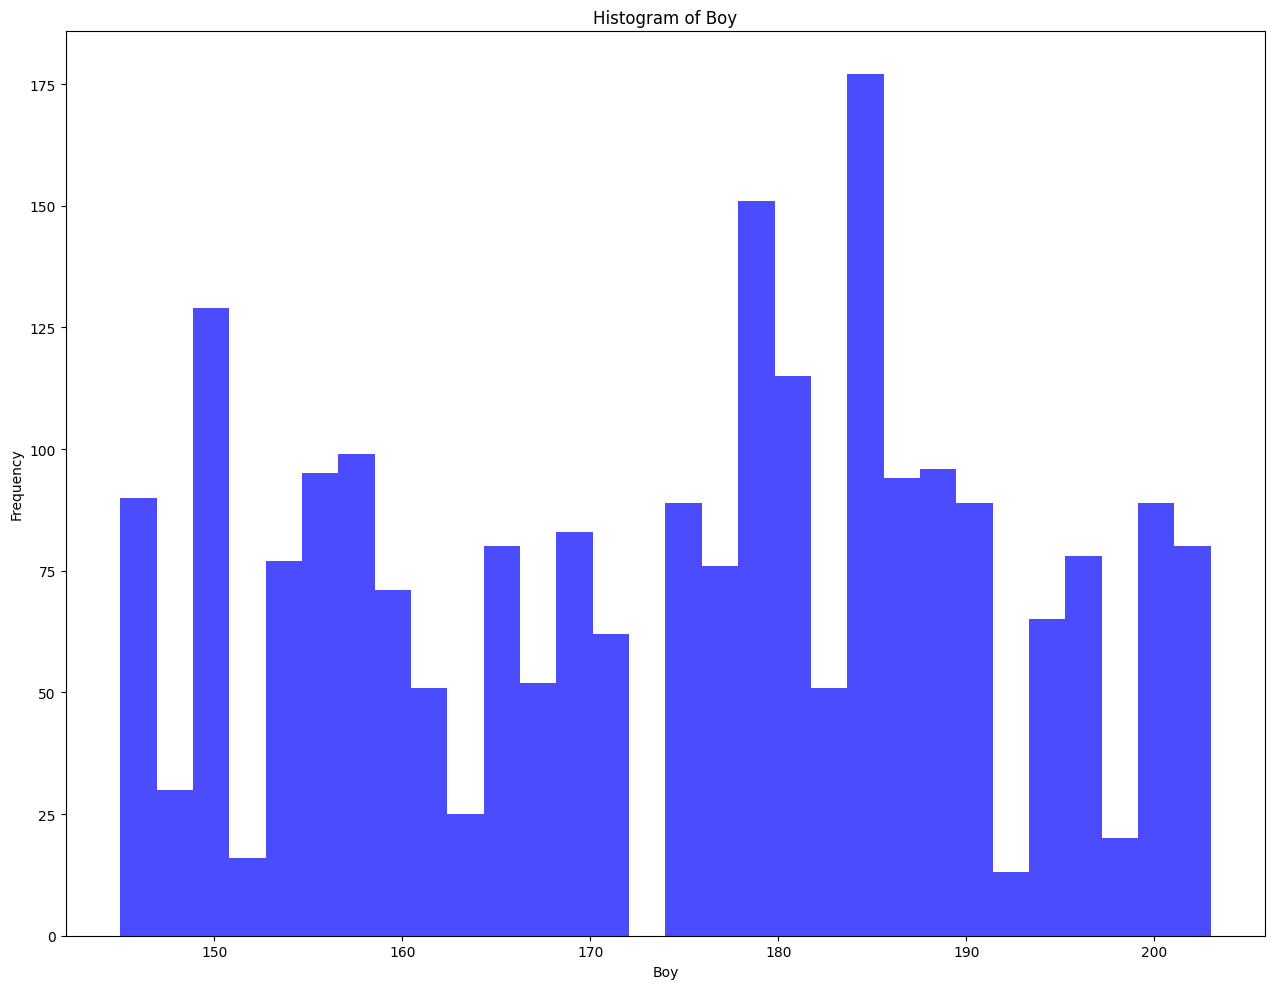

In [112]:
for column in df.columns:
  plt.figure(figsize=(25,10))

  if df[column].dtype=='object':
      plt.subplot(1, 2, 1)
      df[column].value_counts().plot(kind='bar', color='green')
      plt.title(f'Bar Plot of {column}')
      plt.xlabel(f'{column}')
      plt.ylabel('Count')

  elif pd.api.types.is_numeric_dtype(df[column]):
      plt.subplot(1, 2, 1)
      plt.hist(df[column], bins=30, color='blue', alpha=0.7)
      plt.title(f'Histogram of {column}')
      plt.xlabel(f'{column}')
      plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

3-Kullanici_id value is inconsistent

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

**The relationships between Cinsiyet, Boy, and Kilo**

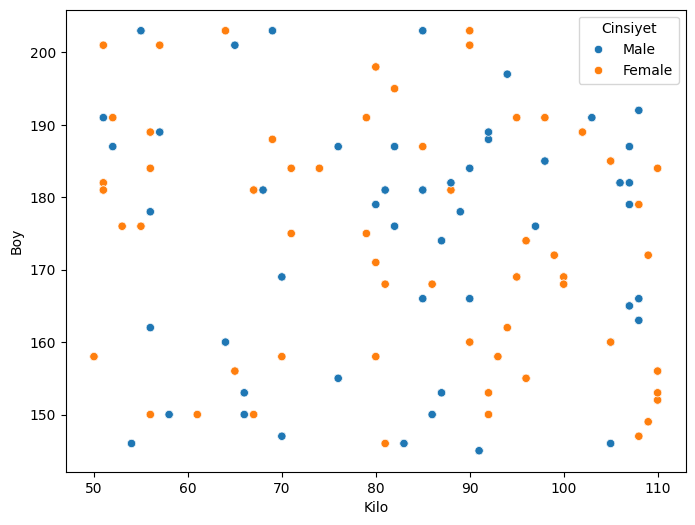

In [114]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Kilo', y='Boy', hue='Cinsiyet', data=df)

plt.xlabel('Kilo')
plt.ylabel('Boy')
plt.show()

#  DATA PREPROCESSİNG

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [116]:
#Remove the Kullanici_id column and the Uyruk column with a single unique value.
df=df.drop(columns=['Kullanici_id','Uyruk'],axis=1)

In [117]:
#Adding a new id value to the dataset.
if 'id' not in df.columns:
    df['id'] = range(len(df))

df = df[['id'] + [col for col in df.columns if col != 'id']]

In [118]:
df.columns

Index(['id', 'Cinsiyet', 'Dogum_Tarihi', 'Il', 'Ilac_Adi',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
       'Kan Grubu', 'Kilo', 'Boy'],
      dtype='object')

**data cleaning**

In [119]:
def clean_text(value):
    if isinstance(value, str):
        value = value.lower()
        value = value.replace('_', ' ')


        return value
    return value

def clean_column_name(name):
    name = name.lower()
    name = name.replace('_', ' ')

    return name

df.columns = [clean_column_name(col) for col in df.columns]

df = df.applymap(clean_text)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                2357 non-null   int64         
 1   cinsiyet                          1579 non-null   object        
 2   dogum tarihi                      2357 non-null   datetime64[ns]
 3   il                                2130 non-null   object        
 4   ilac adi                          2357 non-null   object        
 5   ilac baslangic tarihi             2357 non-null   datetime64[ns]
 6   ilac bitis tarihi                 2357 non-null   datetime64[ns]
 7   yan etki                          2357 non-null   object        
 8   yan etki bildirim tarihi          2357 non-null   datetime64[ns]
 9   alerjilerim                       1873 non-null   object        
 10  kronik hastaliklarim              1965 non-null 

In [121]:
df['cinsiyet'] = df['cinsiyet'].replace({'male': 'erkek', 'female': 'kadin'})

**I created new columns that carry more meaningful information for the model by using the date-type data**

In [122]:

df['dogum tarihi'] = pd.to_datetime(df['dogum tarihi'])
df['ilac baslangic tarihi'] = pd.to_datetime(df['ilac baslangic tarihi'])
df['ilac bitis tarihi'] = pd.to_datetime(df['ilac bitis tarihi'])
df['yan etki bildirim tarihi'] = pd.to_datetime(df['yan etki bildirim tarihi'])

#new yas
df['yas'] = df['ilac baslangic tarihi'].dt.year - df['dogum tarihi'].dt.year

#new ilac kullanim suresi
df['ilac kullanim suresi'] = (df['ilac bitis tarihi'] - df['ilac baslangic tarihi']).dt.days

#new yan etki bildirim suresi
df['yan etki bildirim suresi'] = (df['yan etki bildirim tarihi'] - df['ilac baslangic tarihi']).dt.total_seconds()


In [123]:
df=df.drop(columns=['dogum tarihi','ilac baslangic tarihi','ilac bitis tarihi','yan etki bildirim tarihi'],axis=1)

**Separating the data in the .... Hastaliklarim sections**

In [124]:
columns_to_split = [
    'kronik hastaliklarim',
    'anne kronik hastaliklari',
    'baba kronik hastaliklari',
    'erkek kardes kronik hastaliklari',
    'kiz kardes kronik hastaliklari'
]

for column in columns_to_split:
    df[f'{column} birincil'] = np.nan
    df[f'{column} birincil'] = np.nan

    for index, row in df.iterrows():
        values = str(row[column]).split(', ')

        if len(values) > 0:
            df.at[index, f'{column} birincil'] = values[0]

        if len(values) > 1:
            if values[0] == values[1]:
                df.at[index, f'{column} ikincil'] = np.nan
            else:
                df.at[index, f'{column} ikincil'] = values[1]
        else:
            df.at[index, f'{column} ikincil'] = 'yok'

    # Removing the existing column
    df.drop(columns=[column], inplace=True)

# Replace empty strings (' ') and 'nan' cells with np.nan.
df.replace({' ': np.nan, 'nan': np.nan}, inplace=True)


for column in columns_to_split:
    df[f'{column} ikincil'] = df[f'{column} ikincil'].replace('diger', np.nan)
    df[f'{column} birincil'] = df[f'{column} birincil'].replace('diger', np.nan)


In [125]:
df.isnull().sum()

,0
id,0
cinsiyet,778
il,227
ilac adi,0
yan etki,0
alerjilerim,484
kan grubu,347
kilo,293
boy,114
yas,0


**This section fills the empty values in the 'hastaliklarim' columns based on the diseases of family members**

In [126]:
from collections import Counter

columns_to_fill = [
    'kronik hastaliklarim birincil', 'kronik hastaliklarim ikincil',
    'anne kronik hastaliklari birincil', 'anne kronik hastaliklari ikincil',
    'baba kronik hastaliklari birincil', 'baba kronik hastaliklari ikincil',
    'erkek kardes kronik hastaliklari birincil', 'erkek kardes kronik hastaliklari ikincil',
    'kiz kardes kronik hastaliklari birincil', 'kiz kardes kronik hastaliklari ikincil'
]

for index, row in df.iterrows():
    non_na_values = [row[col] for col in columns_to_fill if pd.notna(row[col])]

    # Find the most frequent one
    if non_na_values:
        most_common = Counter(non_na_values).most_common()

        most_frequent_value = most_common[0][0]

        for col in columns_to_fill:
            if pd.isna(row[col]):
                if col.endswith(' birincil'):
                    df.at[index, col] = most_frequent_value

                    # Assign a different value for the second column.
                    matching_column = col.replace(' birincil', ' ikincil')
                    if matching_column in columns_to_fill:
                        if most_frequent_value == df.at[index, matching_column]:
                            if len(most_common) > 1:
                                df.at[index, matching_column] = most_common[1][0]
                            else:
                                df.at[index, matching_column] = np.nan
                else:
                    if len(most_common) > 1:
                        df.at[index, col] = most_common[1][0]


df.isnull().sum()

,0
id,0
cinsiyet,778
il,227
ilac adi,0
yan etki,0
alerjilerim,484
kan grubu,347
kilo,293
boy,114
yas,0


In [127]:
unique_values = {col: df[col].unique() for col in df.columns}


for column, values in unique_values.items():
    print(f" {column}")
    print(f"Unique Values ({len(values)} count): {values}")
    print("\n")

 id
Unique Values (2357 count): [   0    1    2 ... 2354 2355 2356]


 cinsiyet
Unique Values (3 count): ['erkek' 'kadin' nan]


 il
Unique Values (14 count): ['canakkale' 'trabzon' 'adana' 'izmir' nan 'mersin' 'antalya' 'eskisehir'
 'samsun' 'ankara' 'bursa' 'istanbul' 'malatya' 'kayseri']


 ilac adi
Unique Values (151 count): ['trifluoperazine' 'fluphenazine hcl' 'warfarin sodium' 'valproic acid'
 'carbamazepine extended release' 'fluoxetine dr' 'thiothixene'
 'asenapine tablet, sublingual' 'fluphenazine hcl elixir' 'quetiapine'
 'risperdal consta syringe' 'mirtazapine' 'lamictal xr' 'desonide lotion'
 'olanzapine vial' 'hydrocortisone cream' 'venlafaxine'
 'selegiline patch, transdermal 24 hours' 'alprazolam'
 'halobetasol propionate cream' 'duloxetine hydrochloride' 'lurasidone'
 'methylphenidate suspension, extended release 24 hr, reconstituted (suspension, er reconstituted)'
 'chlordiazepoxide-amitriptyline' 'divalproex sodium capsule, sprinkle'
 'phenelzine' 'carbamazepine cr' 

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2357 non-null   int64  
 1   cinsiyet                                   1579 non-null   object 
 2   il                                         2130 non-null   object 
 3   ilac adi                                   2357 non-null   object 
 4   yan etki                                   2357 non-null   object 
 5   alerjilerim                                1873 non-null   object 
 6   kan grubu                                  2010 non-null   object 
 7   kilo                                       2064 non-null   float64
 8   boy                                        2243 non-null   float64
 9   yas                                        2357 non-null   int32  
 10  ilac kullanim suresi    

**Filling missing values in numeric columns using KNN**

In [129]:
from sklearn.impute import KNNImputer

In [130]:

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.values
num_impute = KNNImputer(n_neighbors=5)

num_impute.fit(df[numerical_features])
df[numerical_features] = num_impute.transform(df[numerical_features])

**Filling missing values in categorical columns with the Simpleİmputer**

In [131]:
from sklearn.impute import SimpleImputer

In [132]:
categorical_columns = df.select_dtypes(include=['object']).columns

imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the categorical columns
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

In [133]:
df.isnull().sum()

,0
id,0
cinsiyet,0
il,0
ilac adi,0
yan etki,0
alerjilerim,0
kan grubu,0
kilo,0
boy,0
yas,0


**Converting categorical values in the dataset to numeric expressions using Label Encoder.**

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [136]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


**Detecting outliers with IQR**

In [137]:

def detect_outliers_iqr(df, numeric_columns):
    # IQR
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

    return outliers

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

outliers_detected_train = detect_outliers_iqr(df, numeric_columns)

outliers_detected_train

,0
id,0
cinsiyet,0
il,0
ilac adi,0
yan etki,0
alerjilerim,0
kan grubu,0
kilo,0
boy,0
ilac kullanim suresi,0


**Applying StandardScaler**

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
numeric_columns

Index(['id', 'cinsiyet', 'il', 'ilac adi', 'yan etki', 'alerjilerim',
       'kan grubu', 'kilo', 'boy', 'yas', 'ilac kullanim suresi',
       'yan etki bildirim suresi', 'kronik hastaliklarim birincil',
       'kronik hastaliklarim ikincil', 'anne kronik hastaliklari birincil',
       'anne kronik hastaliklari ikincil', 'baba kronik hastaliklari birincil',
       'baba kronik hastaliklari ikincil',
       'erkek kardes kronik hastaliklari birincil',
       'erkek kardes kronik hastaliklari ikincil',
       'kiz kardes kronik hastaliklari birincil',
       'kiz kardes kronik hastaliklari ikincil'],
      dtype='object')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2357 non-null   float64
 1   cinsiyet                                   2357 non-null   float64
 2   il                                         2357 non-null   float64
 3   ilac adi                                   2357 non-null   float64
 4   yan etki                                   2357 non-null   float64
 5   alerjilerim                                2357 non-null   float64
 6   kan grubu                                  2357 non-null   float64
 7   kilo                                       2357 non-null   float64
 8   boy                                        2357 non-null   float64
 9   yas                                        2357 non-null   float64
 10  ilac kullanim suresi    

# The Final State of the Data


In [142]:
df

,id,cinsiyet,il,ilac adi,yan etki,alerjilerim,kan grubu,kilo,boy,yas,...,kronik hastaliklarim birincil,kronik hastaliklarim ikincil,anne kronik hastaliklari birincil,anne kronik hastaliklari ikincil,baba kronik hastaliklari birincil,baba kronik hastaliklari ikincil,erkek kardes kronik hastaliklari birincil,erkek kardes kronik hastaliklari ikincil,kiz kardes kronik hastaliklari birincil,kiz kardes kronik hastaliklari ikincil
0,-1.731316,-1.527680,-0.293077,1.456412,0.197161,-1.148030,1.442078,1.252823,1.011701,0.717868,...,-0.456203,0.318154,1.344770,1.309473,-0.613316,-0.670521,1.027850,-0.799715,1.040066,-0.115129
1,-1.729846,-1.527680,1.650734,-0.207831,1.497648,1.797628,0.527021,0.005805,0.393550,1.764074,...,1.448617,-0.283683,-0.274863,-0.102434,-0.613316,-0.670521,1.357103,-1.089302,1.702975,-0.391463
2,-1.728377,0.654588,-0.293077,1.638794,-0.958828,1.285340,1.442078,0.685997,-1.028197,-0.079242,...,-0.138733,-0.885520,1.020843,-0.949578,-0.954417,0.854684,-0.947667,1.227400,-0.948660,0.713871
3,-1.726907,-1.527680,-1.264982,1.502007,0.775155,1.413412,0.527021,0.187190,-0.595492,-0.129061,...,-1.091143,0.017235,1.668696,-0.102434,0.068886,-0.365480,0.040091,0.358637,-1.280114,1.266538
4,-1.725437,0.654588,0.435852,-1.165340,-1.536823,-0.763814,0.527021,1.026092,-0.162786,-0.079242,...,-1.091143,0.017235,0.372990,0.744710,-1.636619,-0.670521,-1.606173,-0.510127,-0.948660,-1.496797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,1.725437,0.654588,-1.264982,-0.823373,-0.091837,-0.251526,0.527021,-1.751356,-1.399088,0.867326,...,1.448617,-1.186438,-1.246643,-0.667196,1.774390,-1.585644,1.357103,0.069049,1.702975,-1.220463
2353,1.726907,0.654588,1.164781,0.840870,-1.536823,-0.123453,0.527021,0.221199,0.208105,-1.474183,...,-1.408614,1.521828,-1.246643,0.744710,-0.272215,-1.585644,-1.276920,-1.089302,1.371521,0.161204
2354,1.728377,0.654588,1.164781,1.410816,1.497648,-0.891886,0.984549,0.515949,1.753483,1.166242,...,-0.773673,1.220909,-0.598790,1.309473,-1.636619,0.854684,0.040091,0.937812,-1.280114,-0.944130
2355,1.729846,-1.527680,0.678829,-0.435809,-0.958828,1.541484,0.527021,0.515949,0.578995,-0.278519,...,-1.726084,-1.487357,0.049063,-1.514340,1.433290,1.159725,-1.276920,0.937812,0.708612,0.990205
